<a href="https://colab.research.google.com/github/dielemonteiro/Portfolio/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=ea624018ff96fa1fdcbfbde33fd16db7963f7f61e7e2c04e97a7f46b1634d2d3
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import plotly.express as px



#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "dielemonteirogomes"
os.environ['KAGGLE_KEY'] = "21a7d125edd5dbe2c60bde3eb66fac59"


In [ ]:
import kaggle

kaggle.api.dataset_download_files('arashnic/book-recommendation-dataset', path='dataset/', unzip=True)


## **Introduction**



This project had the objective of answering 3 tasks, the first is about the recommendation system using the concept of Content and Collaborative filtering (user-user or item-item). The second task is about Market Basket Analysis using and comparing the algorithms Apriori and FP Growth. And the third task is to create an interactive Dashboard aimed at young adults (18 - 35) to summarise the most crucial information in the data and demonstrate through your visual analysis why this dataset is appropriate for machine learning models in an online retail firm.

The project is divided into three parts, Part 1 to  Recommendation System, Part 2  Market Basket Analysis (MBA) and Part 3 Dashboard. For Parts 1 and 3 was used the Book Recommendation Dataset is available on Plataforme Kaggle, this dataset comprises 3 files: Users, Books and Ratings. And Part 2 used the Groceries Dataset.

## **Part 1**

**What is the purpose of a recommendation system for online retail business in machine learning?**

The main objective of a recommendation system is to enhance the user experience during navigation and, consequently, generate good results for the business. In the past, the main recommendation system used was word of mouth, that is, users who had similarities indicated items to other users manually, so to speak. Now with a faster and more automatic way for the user's eyes, recommendations are made for items of interest to the user, causing the probability of purchase to be increased considerably.

### Businnes Understanding

The Business Understand aims to compare Content and Collaborative filtering using the  Book Recommendation Dataset.

In [ ]:
# Creating the DataFrame book

book = pd.read_csv('dataset/Books.csv')
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
# Creating the DataFrame rating

rating = pd.read_csv('dataset/Ratings.csv')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# Creating the DataFrame users

users = pd.read_csv('dataset/Users.csv')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
merge_1 = pd.merge(book, rating, on='ISBN')
merge_1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [ ]:
merge_2 = pd.merge(merge_1, users, on='User-ID')
merge_2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0


### Data Preparation

In [103]:
# Creating a unique dataset

df = merge_2.copy()
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [ ]:
# Convert the column to integers

df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce').fillna(-1).astype(int)

In [ ]:
# Spliting the columns 'Location' to create the columns 'City', 'State' and 'Country' 

spliting = df['Location'].str.split(pat=',',expand=True)
df['City'] = spliting[0].str.strip()
df['State'] = spliting[1].str.strip()
df['Country'] = spliting[2].str.strip()

df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,usa
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0,madrid,madrid,spain
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0,grand prairie,texas,usa


In [ ]:
df['Country'].unique()

array(['usa', 'canada', 'n/a', '', 'malaysia', 'spain', 'new zealand',
       'finland', 'united kingdom', 'netherlands', 'portugal', 'brazil',
       'germany', 'austria', 'italy', 'australia', 'france', 'costa rica',
       'poland', 'us', 'idaho', 'iran', 'aruba', 'indonesia', 'india',
       'pakistan', 'taiwan', 'singapore', 'argentina', 'romania',
       'greece', 'england', 'ireland', 'belgium', 'philippines"',
       'mexico', 'philippines', 'south africa', 'burkina faso', 'kansas',
       'ile de france', 'croatia', 'switzerland', 'denmark', 'rwanda',
       'yugoslavia', 'turkey', 'china', 'japan', 'illinois', 'qatar',
       'latvia', 'sweden', 'kuwait', 'nepal', 'peru', 'venezuela',
       'south korea"', 'hong kong', '61 men', 'cambridgeshire',
       'united states', 'north carolina', 'slovakia', 'norway',
       'dominican republic', 'ontario', 'bosnia and herzegovina',
       'south korea', 'macedonia', 'kenya', 'mauritius', 'virginia',
       'catalonia', 'yu-song', 'm

In [ ]:
countries = df['Country'].unique()

df['Country'] = [country.replace('"', '').strip('/\\').title() for country in df['Country']]

In [ ]:
# Checking the values to USA, Canada, Mexico

search_strings = ['Usa', 'Canada', 'Mexico']
search_result = df[df['Country'].str.contains('|'.join(search_strings))]
search_result

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,Usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031127,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,http://images.amazon.com/images/P/0152049266.0...,http://images.amazon.com/images/P/0152049266.0...,245444,8,"linclon, nebraska, usa",18.0,linclon,nebraska,Usa
1031130,0817310916,One Day in the Life of a Born Again Loser: And...,Helen Norris,2000,University of Alabama Press,http://images.amazon.com/images/P/0817310916.0...,http://images.amazon.com/images/P/0817310916.0...,http://images.amazon.com/images/P/0817310916.0...,259416,0,"parkton, maryland, usa",NaN,parkton,maryland,Usa
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,Usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,Usa


In [ ]:
# Create a Dataframe with the countries USA, Canada, Mexico

countries = ['Usa', 'Canada', 'Mexico']
df = df[df['Country'].str.contains('|'.join(search_strings))]
df   

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,Usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031127,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,http://images.amazon.com/images/P/0152049266.0...,http://images.amazon.com/images/P/0152049266.0...,245444,8,"linclon, nebraska, usa",18.0,linclon,nebraska,Usa
1031130,0817310916,One Day in the Life of a Born Again Loser: And...,Helen Norris,2000,University of Alabama Press,http://images.amazon.com/images/P/0817310916.0...,http://images.amazon.com/images/P/0817310916.0...,http://images.amazon.com/images/P/0817310916.0...,259416,0,"parkton, maryland, usa",NaN,parkton,maryland,Usa
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,Usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,Usa


In [ ]:
df['Country'].unique()

array(['Usa', 'Canada', 'Mexico', 'New Mexico', 'Hungary And Usa',
       'Usa & Canada', 'Usa Now', 'Usa (Currently Living In England)'],
      dtype=object)

In [ ]:
# To search is contained within a string of a Series or Index

search_strings = ['Hungary And Usa', 'Usa & Canada', 'Usa Now', 'England', 'New Mexico']
search_result = df[df['Country'].str.contains('|'.join(search_strings))]
search_result

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
922002,0380973650,American Gods: A Novel,Neil Gaiman,2001,William Morrow,http://images.amazon.com/images/P/0380973650.0...,http://images.amazon.com/images/P/0380973650.0...,http://images.amazon.com/images/P/0380973650.0...,52768,0,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
922003,0345413865,Billy Straight : A Novel,JONATHAN KELLERMAN,1999,Ballantine Books,http://images.amazon.com/images/P/0345413865.0...,http://images.amazon.com/images/P/0345413865.0...,http://images.amazon.com/images/P/0345413865.0...,52768,7,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
922004,0671740679,Dalva (Contemporary Classics (Washington Squar...,Jim Harrison,1991,Washington Square Press,http://images.amazon.com/images/P/0671740679.0...,http://images.amazon.com/images/P/0671740679.0...,http://images.amazon.com/images/P/0671740679.0...,52768,7,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
922005,0380718774,Beggars in Spain (Beggars Trilogy (Paperback)),Nancy Kress,1994,Eos,http://images.amazon.com/images/P/0380718774.0...,http://images.amazon.com/images/P/0380718774.0...,http://images.amazon.com/images/P/0380718774.0...,52768,6,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
922006,0312874766,"Domain (Alten, Steve. Domain Series, Bk. 1.)",Steve Alten,2001,Forge,http://images.amazon.com/images/P/0312874766.0...,http://images.amazon.com/images/P/0312874766.0...,http://images.amazon.com/images/P/0312874766.0...,52768,6,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
922007,1571740120,The Seventh Mesa: A Novel,Mary Summer Rain,1994,Hampton Roads Publishing Company,http://images.amazon.com/images/P/1571740120.0...,http://images.amazon.com/images/P/1571740120.0...,http://images.amazon.com/images/P/1571740120.0...,52768,7,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
922008,0425165396,Chile Death: A China Bayles Mystery (China Bay...,Susan Wittig Albert,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425165396.0...,http://images.amazon.com/images/P/0425165396.0...,http://images.amazon.com/images/P/0425165396.0...,52768,7,"clayton,, new mexico, usa",NaN,clayton,,New Mexico
936551,0440204194,Firefly Summer,Maeve Binchy,1989,Dell,http://images.amazon.com/images/P/0440204194.0...,http://images.amazon.com/images/P/0440204194.0...,http://images.amazon.com/images/P/0440204194.0...,167766,0,"albuquerque,, new mexico, usa",NaN,albuquerque,,New Mexico
936552,0553582526,Dust to Dust,TAMI HOAG,2002,Bantam,http://images.amazon.com/images/P/0553582526.0...,http://images.amazon.com/images/P/0553582526.0...,http://images.amazon.com/images/P/0553582526.0...,167766,8,"albuquerque,, new mexico, usa",NaN,albuquerque,,New Mexico
936553,0515114049,Fall from Grace,Andrew M. Greeley,1994,Jove Books,http://images.amazon.com/images/P/0515114049.0...,http://images.amazon.com/images/P/0515114049.0...,http://images.amazon.com/images/P/0515114049.0...,167766,0,"albuquerque,, new mexico, usa",NaN,albuquerque,,New Mexico


In [ ]:
# Replacing the wrong values

df['Country'].replace(to_replace = 'Hungary And Usa', value = 'Usa', inplace = True)
df['Country'].replace(to_replace = 'Usa & Canada', value = 'Usa', inplace = True)
df['Country'].replace(to_replace = 'New Mexico', value = 'Usa', inplace = True)
df['City'].replace(to_replace = 'budapest and boston', value = 'Boston', inplace = True)
df['State'].replace(to_replace = 'budapest and boston', value = 'Massachusetts', inplace = True)

# Drop user with Usa Now
df.drop(df[df['User-ID'] == 136714].index, inplace=True)
df.drop(df[df['Country'].str.contains('England')].index, inplace=True)

In [ ]:
df['Country'].unique()

array(['Usa', 'Canada', 'Mexico'], dtype=object)

In [ ]:
# Converter the country names to official short names

import country_converter as coco

def get_matched_countries(country_list):
    matched_countries = []
    for country in country_list:
        # Try to convert the country name to ISO3 code
        iso3 = coco.convert(country, to='ISO3', not_found=None)
        if iso3:
            matched_countries.append(coco.convert(iso3, to='name_short', not_found=None))
    return matched_countries

countries = df['Country'].unique()
matched_countries = get_matched_countries(countries)
print(matched_countries)


['United States', 'Canada', 'Mexico']


In [ ]:
# Checking for missing values

df.isnull().sum().sort_values(ascending = False)

Age                    220139
Publisher                   2
Image-URL-L                 2
ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Image-URL-S                 0
Image-URL-M                 0
User-ID                     0
Book-Rating                 0
Location                    0
City                        0
State                       0
Country                     0
dtype: int64

In [ ]:
# Check for duplicates

duplicate_rows=df[df.duplicated(keep=False)]
print('Number of duplicate rows: ',duplicate_rows.shape[0])

Number of duplicate rows:  0


In [106]:
#Making EDA easier with ProfileReport from pandas_profilling 

from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
df.drop(columns=["Image-URL-S","Image-URL-M"],axis=1,inplace=True)

In [ ]:
import re
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())

In [ ]:
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,Usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
3,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031127,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,245444,8,"linclon, nebraska, usa",18.0,linclon,nebraska,Usa
1031130,0817310916,One Day in the Life of a Born Again Loser And ...,Helen Norris,2000,University of Alabama Press,http://images.amazon.com/images/P/0817310916.0...,259416,0,"parkton, maryland, usa",NaN,parkton,maryland,Usa
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,Usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,Usa


### Data Visualization

In [ ]:
dataviz = df.copy()
dataviz

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,Usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
3,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031127,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,245444,8,"linclon, nebraska, usa",18.0,linclon,nebraska,Usa
1031130,0817310916,One Day in the Life of a Born Again Loser And ...,Helen Norris,2000,University of Alabama Press,http://images.amazon.com/images/P/0817310916.0...,259416,0,"parkton, maryland, usa",NaN,parkton,maryland,Usa
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,Usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,Usa


In [ ]:
total_book = dataviz['Book-Title'].count()
total_book

838305

In [ ]:
country_counts = dataviz['Country'].value_counts()
country_counts

Usa       745089
Canada     92918
Mexico       298
Name: Country, dtype: int64

In [ ]:
import plotly.express as px

country_data = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

fig = px.choropleth(country_data, locations = 'Country',
                    locationmode='country names',
                    color = 'Count',
                    hover_name = 'Country',
                    scope="north america",
                    color_continuous_scale = px.colors.sequential.Plasma)

fig.show()

In [ ]:
# Plotting the locations with more ratings published

fig_ = px.bar(dataviz.value_counts('Country', ascending = False),
                 x = dataviz.value_counts('Country', ascending = False).index,
                 y = dataviz.value_counts('Country', ascending = False),
                 title = "The Country with more ratings rated", text_auto='.2s')

fig_.update_layout(height = 600, width = 1000, xaxis_title = 'Rating Count',
                      yaxis_title = 'Location')

fig_.update_yaxes(automargin = True, title_standoff = 10)

fig_.show()

In [ ]:
dataviz.groupby(by=['Country']).count()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State
Country,,,,,,,,,,,,
Canada,92918,92918,92918,92918,92918,92918,92918,92918,92918,65383,92918,92918
Mexico,298,298,298,298,298,298,298,298,298,219,298,298
Usa,745089,745089,745089,745089,745087,745087,745089,745089,745089,552564,745089,745089


In [ ]:
country_count = dataviz.groupby('Country')['ISBN'].count()
country_count = pd.DataFrame({'Country': country_count.index, 'Total': country_count.values})
country_count

,Country,Total
0,Canada,92918
1,Mexico,298
2,Usa,745089


In [ ]:
country_counts = country_count.groupby('Country').sum().sort_values(by='Total', ascending=False)
country_counts

,Total
Country,
Usa,745089
Canada,92918
Mexico,298


In [ ]:
dataviz.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L', 'User-ID', 'Book-Rating', 'Location', 'Age', 'City',
       'State', 'Country'],
      dtype='object')

In [ ]:

def set_age_category(v):

    if (v<= 10):
        return "age group 0-10"
    elif (v>10)&(v<=19):
        return "age group 11-19"
    elif (v>19)&(v<=29):
        return "age group 20-29"
    elif (v>29)&(v<=39):
        return "age group 30-39"
    elif (v>39)&(v<=49):
        return "age group 40-49"
    elif (v>49)&(v<=59):
        return "age group 50-59"
    elif(v>60):
        return "age group > 60"

In [ ]:
temp = dataviz.copy()
temp.dropna(inplace=True)
temp['age_category'] = temp['Age'].apply(set_age_category)
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country,age_category
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,Usa,age group 11-19
18,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,ottawa,ontario,Canada,age group 40-49
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49.0,ottawa,ontario,Canada,age group 40-49
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49.0,ottawa,ontario,Canada,age group 40-49
21,0671021001,She s Come Undone Oprah s Book Club,Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49.0,ottawa,ontario,Canada,age group 40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031126,3430121906,Mit den WÃ lfen heulen fabelhafte Spruchweishe...,Vitus B DrÃ¶scher,1978,Econ,http://images.amazon.com/images/P/3430121906.0...,245302,6,"culiacán, sinaloa, mexico",31.0,culiacán,sinaloa,Mexico,age group 30-39
1031127,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,245444,8,"linclon, nebraska, usa",18.0,linclon,nebraska,Usa,age group 11-19
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,Usa,age group 11-19
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,Usa,age group 30-39


In [ ]:
temp.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 0
Image-URL-L               0
User-ID                   0
Book-Rating               0
Location                  0
Age                       0
City                      0
State                     0
Country                   0
age_category           3255
dtype: int64

In [ ]:
age_group = temp.groupby(['age_category', 'Country']).size().reset_index(name='count')
age_group_count = age_group.groupby(by=['age_category']).sum()[['count']].sort_values(by='age_category', ascending=True)


age_group_count

,count
age_category,
age group 0-10,3950
age group 11-19,24632
age group 20-29,138484
age group 30-39,201201
age group 40-49,133867
age group 50-59,82696
age group > 60,30079


In [ ]:
age_group = temp.groupby('age_category').size().reset_index(name='count')
age_group = age_group.sort_values(by='age_category', ascending=False)

fig_ = px.bar(age_group,
              x='age_category',
              y='count',
              title="Distribution of Books by Age Category")

fig_.update_layout(xaxis_title='Age Category', yaxis_title='Count')

fig_.show()

In [ ]:
top_books = dataviz['Book-Title'].value_counts().nlargest(10)
top_books_df = pd.DataFrame({'title': top_books.index, 'occurances': top_books.values})


fig = px.bar(top_books_df, x='occurances', y='title', orientation='h', title='Top 10 of books with more ratings',
             labels={'occurances': 'Number of Occurance', 'title': 'Books'})

fig.update_layout(height=700, width=1000)
fig.show()


In [ ]:

top_books_by_country = dataviz.groupby(['Country', 'Book-Title']).size().groupby(level=0).nlargest(10).reset_index(level=0, drop=True).reset_index(name='Occurances')
fig = px.bar(top_books_by_country, x='Occurances', y='Book-Title', color='Country',
             title='Top 10 Books by Country', labels={'Occurances': 'Number of Occurrences'})

fig.update_layout(height=600, width=1000, yaxis={'categoryorder': 'total ascending'})
fig.show()


In [ ]:
temp.drop(temp[temp['Year-Of-Publication'] > 2023].index, inplace=True)
temp.drop(temp[temp['Year-Of-Publication'] == 0].index, inplace=True)
temp.drop(temp[temp['Year-Of-Publication'] == -1].index, inplace=True)

In [ ]:
fig_ = px.bar(temp.value_counts('Year-Of-Publication', ascending = False),
                 x = temp.value_counts('Year-Of-Publication', ascending = False).index,
                 y = temp.value_counts('Year-Of-Publication', ascending = False),
                 title = "Distribution of Books by Year")

fig_.update_layout(height = 600, width = 1000, xaxis_title = 'Rating Count',
                      yaxis_title = 'Location')

fig_.update_yaxes(automargin = True, title_standoff = 10)

fig_.show()

In [ ]:
yer = temp['Year-Of-Publication'].sort_values(ascending = False)
yer.head(50)

74503     2021
519685    2020
740027    2020
206031    2020
708113    2020
990331    2020
630948    2020
334145    2020
738900    2020
203488    2011
59185     2011
136087    2011
23408     2011
728456    2011
92651     2011
119839    2011
720037    2010
983521    2010
616757    2005
955234    2005
996048    2005
423339    2005
657642    2005
162889    2005
191565    2005
588944    2005
364821    2005
357241    2005
725513    2005
647965    2005
243500    2005
162884    2005
257945    2005
664783    2005
182447    2005
671351    2005
307589    2005
804302    2005
523259    2005
807250    2005
192899    2005
698941    2005
634336    2005
807249    2005
507673    2005
70947     2005
807248    2005
208400    2005
390713    2005
560471    2005
Name: Year-Of-Publication, dtype: int64

In [ ]:

# Calcular o número total de avaliações para cada livro
popularity_by_reviews = dataviz['Book-Title'].value_counts()

# Calcular a média das avaliações para cada livro
popularity_by_rating = dataviz.groupby('Book-Title')['Book-Rating'].mean()

# Calcular o número de leitores únicos para cada livro
popularity_by_readers = dataviz.groupby('ISBN')['User-ID'].nunique()

# Calcular a popularidade por região
popularity_by_region = dataviz['Country'].value_counts()

# Calcular a popularidade por ano
popularity_by_year = dataviz['Year-Of-Publication'].value_counts()

# Exibir os resultados
print("Popularidade por avaliações:")
print(popularity_by_reviews)
print("\nPopularidade por média das avaliações:")
print(popularity_by_rating)
print("\nPopularidade por número de leitores únicos:")
print(popularity_by_readers)
print("\nPopularidade por região:")
print(popularity_by_region)
print("\nPopularidade por ano:")
print(popularity_by_year)


Popularidade por avaliações:
Wild Animus                                       1434
The Lovely Bones A Novel                          1051
Divine Secrets of the Ya Ya Sisterhood A Novel     777
A Painted House                                    756
The Da Vinci Code                                  749
                                                  ... 
What Am I Very First Riddles                         1
Whom God Hath Joined Pocket Classics                 1
MTV s Real World Chicago                             1
Can t Lose Weight You Could Have Syndrome X          1
Anglo American Cataloguing Rules                     1
Name: Book-Title, Length: 193467, dtype: int64

Popularidade por média das avaliações:
Book-Title
01 01 00 A Novel of the Millennium                                                        2.666667
01 01 00 The Novel of the Millennium                                                      2.388889
0373953194 Christmas Stories 1993                                     

In [ ]:
import plotly.graph_objects as go

most_books = dataviz.groupby('Book-Author')['Book-Title'].count().reset_index().sort_values('Book-Title', ascending=False).head(5)

fig = go.Figure(data=[go.Bar(
    x=most_books['Book-Title'],
    y=most_books['Book-Author'],
    orientation='h',
    marker=dict(
        color=most_books['Book-Title'],
        colorscale='viridis',
        line=dict(color='rgba(31, 119, 180, 1.0)', width=1)  
    )
)])

fig.update_layout(
    title="Top 5 authors with most books",
    xaxis_title="Total number of books",
    yaxis_title="Authors",
    height=600,
    width=800,
    bargap=0.2,  
    bargroupgap=0.1,  
    template='plotly_white'  
)

fig.show()


In [ ]:
author_1 = ['Stephen King']
search_author_1 = dataviz[dataviz['Book-Author'].str.contains('|'.join(author_1))]
search_author_1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
11228,0451170385,Four Past Midnight,Stephen King,2001,Signet Book,http://images.amazon.com/images/P/0451170385.0...,41385,0,"sudbury, ontario, canada",NaN,sudbury,ontario,Canada
11728,0451150325,Shining,Stephen King,1981,Signet Book,http://images.amazon.com/images/P/0451150325.0...,96054,0,"ottawa, ontario, canada",29.0,ottawa,ontario,Canada
11946,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,http://images.amazon.com/images/P/0451151259.0...,177458,8,"ottawa, ontario, canada",29.0,ottawa,ontario,Canada
11950,0451177096,Dolores Claiborne,Stephen King,2004,Signet Book,http://images.amazon.com/images/P/0451177096.0...,177458,7,"ottawa, ontario, canada",29.0,ottawa,ontario,Canada
11989,0451139739,Christine,Stephen King,1983,New Amer Library,http://images.amazon.com/images/P/0451139739.0...,177458,7,"ottawa, ontario, canada",29.0,ottawa,ontario,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016785,0671045857,The Girl Who Loved Tom Gordon,Stephen King,1999,Audioworks,http://images.amazon.com/images/P/0671045857.0...,179423,7,"raleigh, north carolina, usa",32.0,raleigh,north carolina,Usa
1016788,0671582348,Bag Of Bones Cassette,Stephen King,1998,Simon &amp; Schuster Audio,http://images.amazon.com/images/P/0671582348.0...,179423,5,"raleigh, north carolina, usa",32.0,raleigh,north carolina,Usa
1019525,0070657599,Bare Bones Conversations on Terror With Stephe...,Stephen King,1988,McGraw-Hill,http://images.amazon.com/images/P/0070657599.0...,226839,6,"merrimack, new hampshire, usa",NaN,merrimack,new hampshire,Usa
1020040,0670315419,Firestarter,Stephen King,1980,Viking Books,http://images.amazon.com/images/P/0670315419.0...,133033,0,"taneytown, maryland, usa",23.0,taneytown,maryland,Usa


In [ ]:
author_1_top5  = search_author_1.sort_values(by='Book-Rating', ascending=False).head(5)
author_1_top5=author_1_top5.set_index('Book-Title')
author_1_top5

,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
Book-Title,,,,,,,,,,,,
The Green Mile,0671041789,Stephen King,1999,Pocket,http://images.amazon.com/images/P/0671041789.0...,111578,10,"fremont, california, usa",NaN,fremont,california,Usa
The Drawing of the Three The Dark Tower Book 2,0451163524,Stephen King,1997,Signet Book,http://images.amazon.com/images/P/0451163524.0...,254206,10,"tucson, arizona, usa",31.0,tucson,arizona,Usa
The Stand The Complete amp Uncut Edition,0451179285,Stephen King,1994,New Amer Library,http://images.amazon.com/images/P/0451179285.0...,6543,10,"strafford, missouri, usa",34.0,strafford,missouri,Usa
The Girl Who Loved Tom Gordon A Novel,0684867621,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,254337,10,"brantford, ontario, canada",36.0,brantford,ontario,Canada
The Waste Lands The Dark Tower Book 3,0451173317,Stephen King,1997,Signet Book,http://images.amazon.com/images/P/0451173317.0...,254206,10,"tucson, arizona, usa",31.0,tucson,arizona,Usa


In [ ]:
!pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ipyplot

ipyplot.plot_images(author_1_top5['Image-URL-L'], max_images=10, img_width=150, force_b64 =False)


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


### recommendation system

**Making a brief comparison between Content and Collaborative filtering:**

The content-based recommendation is based on the similarity of recommended items. The basic idea is that if a user likes a certain item, they will also like a similar item. Imagine you're a fan of novel books. Content filtering analyzes information about books, such as genre, keywords, descriptions, and other features, to understand your preferences. Based on that, it recommends books that share similar characteristics. It's like it understands your taste and looks for books that fit that profile.

Collaborative filtering works differently. It doesn't focus on the characteristics of the items but rather on the interactions between users and items. It looks for patterns or similarities among users and items. For example, if you and another person have similar tastes and have liked the same books, collaborative filtering will recommend other books that the other person enjoyed but you haven't seen yet. It leverages the preferences of people similar to you to provide suggestions. Another example is if user A read books 1, 2, 3 and user B read books 2, 3, 4, they seem to have similar interests. Therefore, user A is likely to read Book 4 and user B must read Book 1.

#### **Content Based** 

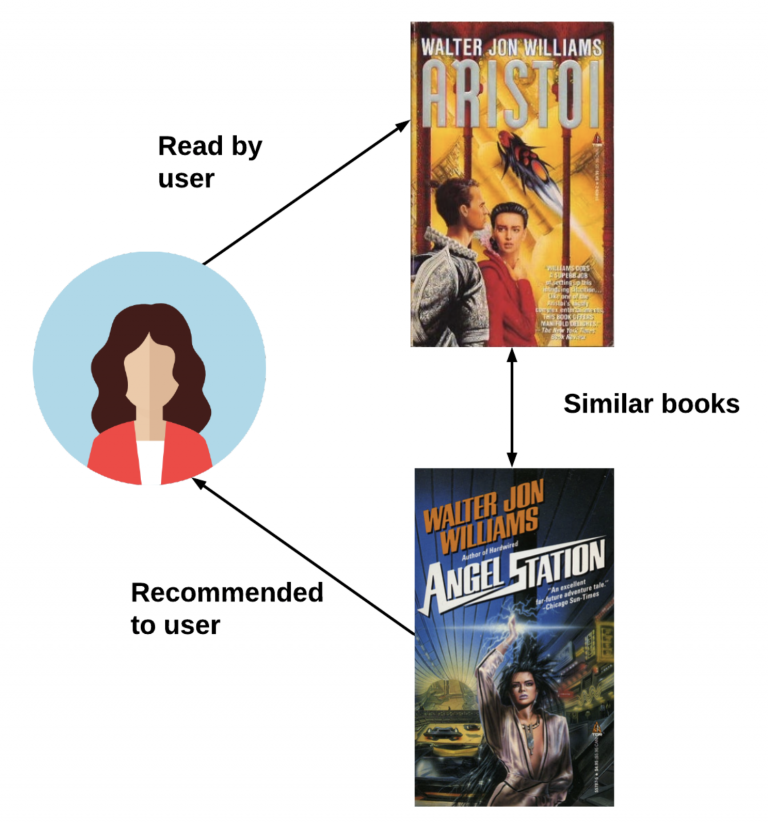

According to Dietmar Jannach, Cambridge University Press and Al (2012, p.53) "The simplest way to describe catalog items is to maintain an explicit list of features for each item (also often called attributes, characteristics, or item profiles). For a book recommender, one could, for instance, use the genre, the author’s name, the publisher, or anything else that describes the item and store this information in a relational database system. When the user’s preferences are described in terms of his or her interests using exactly this set of features, the recommendation task consists of matching item characteristics and user preferences."

In this part of the project I created content-based filtering using the features Book-Title', 'Book-Author', 'Publisher' and 'Country'. To calculate the similarity was used the metric Cosine Similarity.

In [ ]:
df_content = df[['Book-Title','Book-Author', 'Publisher', 'Image-URL-L', 'Book-Rating', 'Country']]

In [ ]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838305 entries, 0 to 1031134
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-Title   838305 non-null  object
 1   Book-Author  838305 non-null  object
 2   Publisher    838303 non-null  object
 3   Image-URL-L  838303 non-null  object
 4   Book-Rating  838305 non-null  int64 
 5   Country      838305 non-null  object
dtypes: int64(1), object(5)
memory usage: 44.8+ MB


In [ ]:
df_content.dropna(inplace=True)
df_content.reset_index(drop=True,inplace=True)

In [ ]:
df_content.index

RangeIndex(start=0, stop=838301, step=1)

In [ ]:
df_content['Count'] = df_content.groupby('Book-Title')['Book-Title'].transform('size')
df_content

,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating,Country,Count
0,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0,Usa,2
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5,Canada,12
2,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,0,Canada,3
3,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,0,Canada,11
4,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,0,Canada,1
...,...,...,...,...,...,...,...
838296,The Window,Jeanette Ingold,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,8,Usa,11
838297,One Day in the Life of a Born Again Loser And ...,Helen Norris,University of Alabama Press,http://images.amazon.com/images/P/0817310916.0...,0,Usa,1
838298,Anthem,Ayn Rand,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,8,Usa,59
838299,A Student of Weather,Elizabeth Hay,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,8,Usa,9


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import requests

In [ ]:
rating_value_counts = pd.DataFrame(df_content['Book-Title'].value_counts())
rare_books = rating_value_counts[rating_value_counts['Book-Title']<=200].index
frequent_books = df_content.loc[(df_content['Count'] > 200) & (df_content['Book-Rating'] > 5)]

frequent_books.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating,Country,Count
19,The Five People You Meet in Heaven,Mitch Albom,Hyperion,http://images.amazon.com/images/P/0786868716.0...,9,Canada,396
20,Life of Pi,Yann Martel,Harcourt,http://images.amazon.com/images/P/0151008116.0...,6,Canada,491
22,The Red Tent Bestselling Backlist,Anita Diamant,Picador USA,http://images.amazon.com/images/P/0312195516.0...,7,Canada,642
27,Good in Bed,Jennifer Weiner,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,8,Canada,438
37,The Horse Whisperer,Nicholas Evans,Dell,http://images.amazon.com/images/P/0440222656.0...,6,Canada,465


In [ ]:
frequent_books=frequent_books.drop_duplicates(subset=['Book-Title'])
frequent_books.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating,Country,Count
19,The Five People You Meet in Heaven,Mitch Albom,Hyperion,http://images.amazon.com/images/P/0786868716.0...,9,Canada,396
20,Life of Pi,Yann Martel,Harcourt,http://images.amazon.com/images/P/0151008116.0...,6,Canada,491
22,The Red Tent Bestselling Backlist,Anita Diamant,Picador USA,http://images.amazon.com/images/P/0312195516.0...,7,Canada,642
27,Good in Bed,Jennifer Weiner,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,8,Canada,438
37,The Horse Whisperer,Nicholas Evans,Dell,http://images.amazon.com/images/P/0440222656.0...,6,Canada,465


In [ ]:
frequent_books.reset_index(inplace=True)

In [ ]:
frequent_books['index']=[i for i in range(frequent_books.shape[0])]
frequent_books.head()

,index,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating,Country,Count
0,0,The Five People You Meet in Heaven,Mitch Albom,Hyperion,http://images.amazon.com/images/P/0786868716.0...,9,Canada,396
1,1,Life of Pi,Yann Martel,Harcourt,http://images.amazon.com/images/P/0151008116.0...,6,Canada,491
2,2,The Red Tent Bestselling Backlist,Anita Diamant,Picador USA,http://images.amazon.com/images/P/0312195516.0...,7,Canada,642
3,3,Good in Bed,Jennifer Weiner,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,8,Canada,438
4,4,The Horse Whisperer,Nicholas Evans,Dell,http://images.amazon.com/images/P/0440222656.0...,6,Canada,465


In [ ]:
target = ['Book-Title','Book-Author', 'Publisher', 'Country']
frequent_books['all_columns'] = [' '.join(map(str, frequent_books[target].iloc[i, ].values)) for i in range(frequent_books[target].shape[0])]
frequent_books.head()

,index,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating,Country,Count,all_columns
0,0,The Five People You Meet in Heaven,Mitch Albom,Hyperion,http://images.amazon.com/images/P/0786868716.0...,9,Canada,396,The Five People You Meet in Heaven Mitch Albom...
1,1,Life of Pi,Yann Martel,Harcourt,http://images.amazon.com/images/P/0151008116.0...,6,Canada,491,Life of Pi Yann Martel Harcourt Canada
2,2,The Red Tent Bestselling Backlist,Anita Diamant,Picador USA,http://images.amazon.com/images/P/0312195516.0...,7,Canada,642,The Red Tent Bestselling Backlist Anita Diaman...
3,3,Good in Bed,Jennifer Weiner,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,8,Canada,438,Good in Bed Jennifer Weiner Washington Square ...
4,4,The Horse Whisperer,Nicholas Evans,Dell,http://images.amazon.com/images/P/0440222656.0...,6,Canada,465,The Horse Whisperer Nicholas Evans Dell Canada


In [ ]:
token = CountVectorizer(stop_words='english')
frequent_books_token = token.fit_transform(frequent_books['all_columns'])
frequent_books_token

<231x746 sparse matrix of type '<class 'numpy.int64'>'
	with 1804 stored elements in Compressed Sparse Row format>

In [ ]:
cosine = cosine_similarity(frequent_books_token)
cosine

array([[1.        , 0.15430335, 0.12598816, ..., 0.        , 0.        ,
        0.        ],
       [0.15430335, 1.        , 0.13608276, ..., 0.        , 0.        ,
        0.        ],
       [0.12598816, 0.13608276, 1.        , ..., 0.11785113, 0.08908708,
        0.13608276],
       ...,
       [0.        , 0.        , 0.11785113, ..., 1.        , 0.18898224,
        0.14433757],
       [0.        , 0.        , 0.08908708, ..., 0.18898224, 1.        ,
        0.10910895],
       [0.        , 0.        , 0.13608276, ..., 0.14433757, 0.10910895,
        1.        ]])

In [ ]:
book_title = 'Jurassic Park'

In [ ]:
index = frequent_books[frequent_books['Book-Title']==book_title]['index'].values[0]
index

21

In [ ]:
close_books = list(enumerate(cosine[index]))
close_books[0]

(0, 0.14285714285714282)

In [ ]:
close_booksSorted=sorted(close_books,key=lambda x:x[1],reverse=True)[1:6]
close_booksSorted[:]

[(24, 0.7715167498104596),
 (71, 0.6172133998483676),
 (155, 0.6172133998483676),
 (151, 0.5714285714285713),
 (216, 0.5714285714285713)]

In [ ]:
r_books=[]

for i in range(len(close_booksSorted)):
    r_books.append(frequent_books[frequent_books['index']==close_booksSorted[i][0]]['Book-Title'].item())
 
print(f'Recommend Books similar to {book_title}:\n')
for book in r_books:
    print(book, 'Rating',end='  -->  ')
    print(round(df[df['Book-Title'] == book]['Book-Rating'].mean(), 2))

Recommend Books similar to Jurassic Park:

Sphere Rating  -->  2.56
Congo Rating  -->  2.4
Disclosure Rating  -->  2.38
Rising Sun Rating  -->  2.29
The Lost World Rating  -->  2.74


let's combine it with building the Recommendation System with a better visualizatio

In [ ]:
def content_based_filtering(book_title):
    book_title=str(book_title)
    
    if book_title in df_content['Book-Title'].values:
        rating_value_counts = pd.DataFrame(df_content['Book-Title'].value_counts())
        rare_books = rating_value_counts[rating_value_counts['Book-Title']<=200].index
        frequent_books = df_content.loc[(df_content['Count'] > 200) & (df_content['Book-Rating'] > 5)]
        

        if book_title in rare_books:
            most_frequent = pd.Series(frequent_books['Book-Title'].unique()).sample(5).values
            
            print("Sorry, there are no recommendations for this book.\n")
            
            fig, ax = plt.subplots(1, 5, figsize=(15, 4))
            fig.suptitle('You may try suggestions based on popularity:', fontsize=20, fontweight='bold')
            
            for i, book in enumerate(most_frequent):
                image_url = frequent_books.loc[frequent_books['Book-Title'] == book, 'Image-URL-L'].iloc[0]
                headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
                response = requests.get(image_url, stream=True, headers=headers)
                image = Image.open(response.raw)
                ax[i].imshow(image)
                ax[i].axis('off')
            
            plt.tight_layout()
            plt.show()

        else:
            frequent_books = frequent_books.drop_duplicates(subset = ['Book-Title'])
            frequent_books.reset_index(inplace = True)
            frequent_books['index'] = [i for i in range(frequent_books.shape[0])]
            target = ['Book-Title','Book-Author', 'Publisher']
            frequent_books['all_columns'] = [' '.join(map(str, frequent_books[target].iloc[i, ].values)) for i in range(frequent_books[target].shape[0])]
            token = CountVectorizer(stop_words='english')
            frequent_books_token = token.fit_transform(frequent_books['all_columns'])
            cosine = cosine_similarity(frequent_books_token)
            index = frequent_books[frequent_books['Book-Title']==book_title]['index'].values[0]
            close_books = list(enumerate(cosine[index]))
            close_booksSorted=sorted(close_books,key=lambda x:x[1],reverse=True)[1:6]

            books=[]
            for i in range(len(close_booksSorted)):
                
                books.append(frequent_books[frequent_books['index']==close_booksSorted[i][0]]['Book-Title'].item())

            fig,ax = plt.subplots(1, 5, figsize=(15, 4))
            fig.suptitle('You might also enjoy these books:', fontsize=20, fontweight='bold')
                
            for i in range(len(books)):
                
                url=frequent_books.loc[frequent_books['Book-Title']==books[i],'Image-URL-L'][:1].values[0]
                headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
                img=Image.open(requests.get(url,stream=True, headers = headers).raw)
                ax[i].imshow(img)
                ax[i].axis('off')
                ax[i].set_title('RATING: {}'.format(round(df[df['Book-Title']==books[i]]['Book-Rating'].mean(),1)), y=-0.20, fontsize=10)
                fig.show()

    else:
        print('I apologise, I cannot find this book in the dataset.')

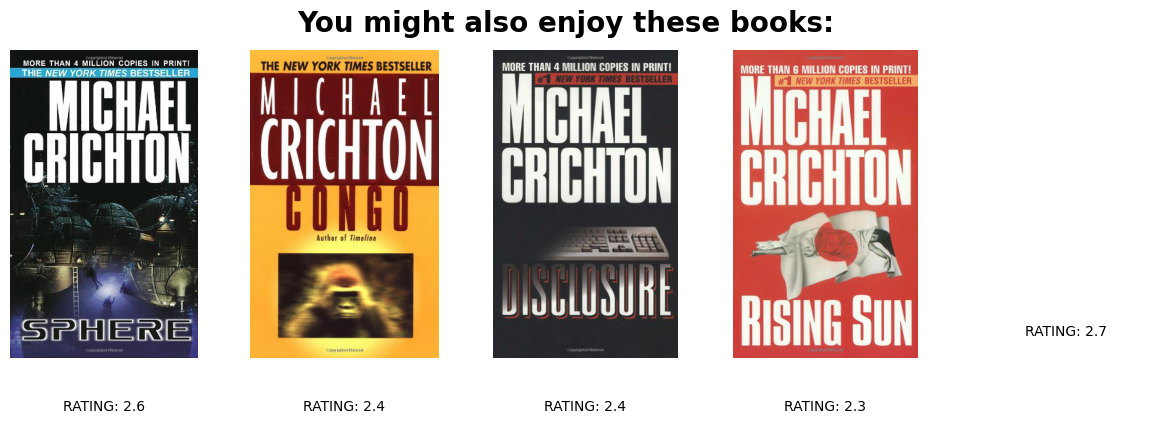

In [ ]:
content_based_filtering('Jurassic Park')

Sorry, there are no recommendations for this book.



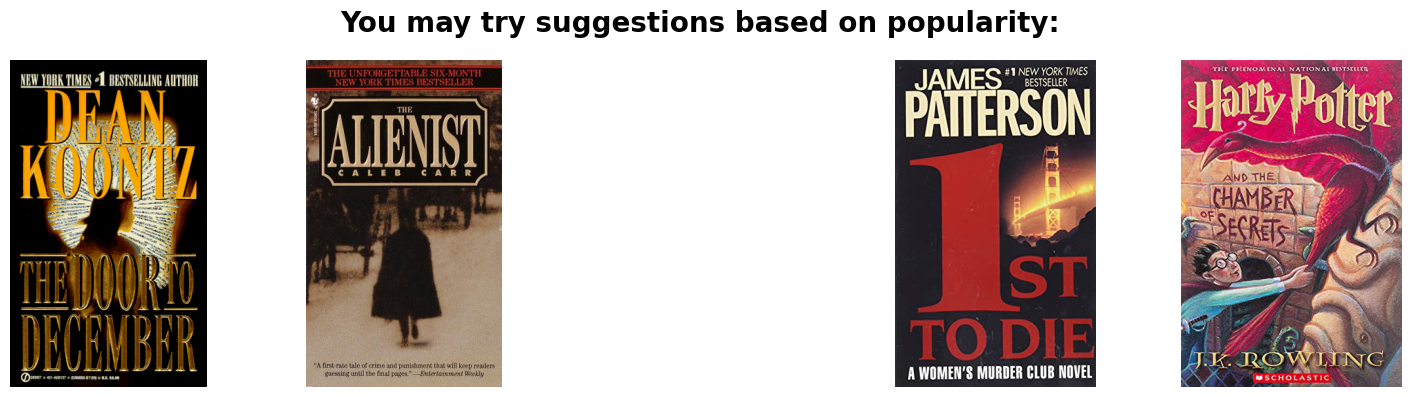

In [ ]:
content_based_filtering('Susquehanna')

In [ ]:
content_based_filtering('Fluent Python')

I apologise, I cannot find this book in the dataset.


This function takes a book title as input and performs content-based filtering to recommend similar books. It first checks if the given book title exists in the dataset. If it is a rare book (appears less than or equal to 200 times), it randomly selects 5 books from the most frequent books as alternative suggestions. If it is not a rare book, it calculates the cosine similarity between the book's feature vector and other books' feature vectors. It then recommends the top 5 most similar books based on cosine similarity scores. The function displays the book covers and average ratings of the recommended books.

I used the book, Jurassic Park as how example, this book is a 1990 science fiction action novel written by Michael Crichton and the recommendation system gave me other books similar to Jurassic Park how Sphere, Disclosure, The Lost World, Congo and Rising Sun, both the books is a novel by Michael Crichton, this is meaning my recommendation system working as well. In addition, I created a rule for books rated rare, the recommendation system will recommend the random books rated Popular and in the end, if not have the book in my dataset the system return a message to user.

#### **Item - Based Collaborative Filtering**

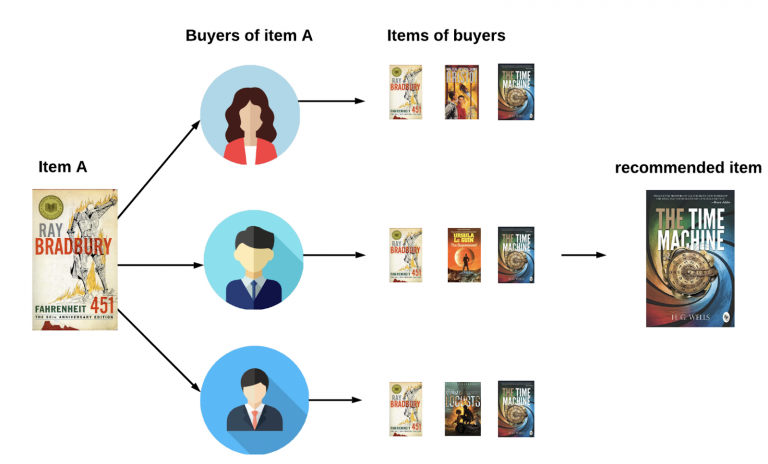

According to Dietmar Jannach, Cambridge University Press and Al (2012, p13) "The main idea of collaborative recommendation approaches is to exploit information about the past behaviour the opinions of an existing user community for predicting which items the current user of the system will most probably like or be interested in. These types of systems are in widespread industrial use today, in particular as a tool in online retail sites to customize the content to the needs of a particular customer and to thereby promote additional items and increase sales."

In this part of the project I created Colaborative filtering (item-item), using features 'Book-Title', 'Book-Rating' and 'User-ID'. 

Item-Based Collaborative Filtering uses the similarity between items to make recommendation predictions. It is based on the idea that similar items are preferred by similar users. In this approach, the similarity between items is calculated based on user interactions with these items. The Nearest Neighbors algorithm was used. The Nearest Neighbors algorithm is an unsupervised machine learning method used to find the k items most similar to a reference item based on a set of features.

In [ ]:
rating['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [ ]:
# Users who have rated more than 200 books

x = rating['User-ID'].value_counts() > 200
x

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: User-ID, Length: 105283, dtype: bool

In [ ]:
y = x[x].index
print(y.shape)

(899,)


In [ ]:
rating = rating[rating['User-ID'].isin(y)]

In [ ]:
book2 = pd.read_csv('dataset/Books.csv')

In [ ]:
rating_with_books = rating.merge(book2, on='ISBN')
rating_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...


In [ ]:
number_rating = rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [ ]:
number_rating.rename(columns={'Book-Rating': 'number_of_ratings'}, inplace = True)
number_rating

,Book-Title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [ ]:
df_item_based = rating_with_books.merge(number_rating, on = 'Book-Title')
df_item_based

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,1
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,1
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,1
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,1


In [ ]:
df_item_based = df_item_based[df_item_based['number_of_ratings'] >= 50]
df_item_based.shape

(61853, 11)

In [ ]:
df_item_based.drop_duplicates(['User-ID', 'Book-Title'], inplace = True)

In [ ]:
book_pivot = df_item_based.pivot_table(columns = 'User-ID', index = 'Book-Title', values='Book-Rating')
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0, inplace=True)
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
model = NearestNeighbors(algorithm='brute', metric = 'minkowski')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# Book 1984 [0]
distances, suggestions = model.kneighbors(book_pivot.iloc[0, :].values.reshape(1, -1))

for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['1984', 'No Safe Place', 'A Civil Action', 'Foucault's Pendulum',
       'Long After Midnight'],
      dtype='object', name='Book-Title')


In [ ]:
# Book Harry Potter [240]
distances, suggestions = model.kneighbors(book_pivot.iloc[240, :].values.reshape(1, -1))

for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Order of the Phoenix (Book 5)'],
      dtype='object', name='Book-Title')



Before creating the Item-Based Collaborative Filtering predictive model, some data preprocessing steps were performed. Firstly, a merge operation was done between the Rating and User datasets to combine the relevant information. Then, the rating matrix was constructed, and the dense rating matrix was converted into a sparse matrix using the csr_matrix() function.

Additionally, some business rules were applied to filter the data. Only users who rated more than 200 books were selected, ensuring that we have sufficient data from active users. Moreover, a filter was applied to select only the books that received more than 50 ratings, thus discarding rare books with limited ratings.

These preprocessing steps helped in creating a more focused and representative dataset for the Item-Based Collaborative Filtering model.

According to Dietmar Jannach, Cambridge University Press and Al (2012, pp.18, 19) "The main idea of item-based algorithms is to compute predictions using the similarity between items and not the similarity between users. Let us examine our ratings database again and make a prediction for Alice for Item 5. We first compare the rating vectors of the other items and look for items that have ratings similar to Item 5. In the example, we see that the ratings for Item 5 (3, 5, 4, 1) are similar to the ratings of Item 1 (3, 4, 3, 1) and there is also a partial similarity with Item 4 (3, 3, 5, 2). The idea of item-based recommendation is now to simply look at Alice’s ratings for these similar items. Alice gave a “5” to Item 1 and a “4” to Item 4. An item-based algorithm computes a weighted average of these other ratings and will predict a rating for Item 5 somewhere between 4 and 5."

Based on the previous quote, the Item-based nearest neighbour recommendation model was built.

I used the book 1984 as an example, and the system returned to me with the books No Safe Place', 'A Civil Action', 'Foucault's Pendulum' and'Long After Midnight', but it wasn't clear if the recommendation system was working well, so I performed another test using the book 'Harry Potter and the Prisoner of Azkaban (Book 3)', and the system returned the books 'Harry Potter books and the Goblet of Fire (Book 4)', 'Harry Potter and the Chamber of Secrets (Book 2)', 'Harry Potter and the Sorcerer's Stone (Book 1)', and 'Harry Potter and the Order of the Phoenix (Book 1) 5)'. This is an excellent result, the system worked perfectly.

<a name="reference"></a>
## **Conclusion**
</div>

Content filtering works well when there is a lot of information about the items and when it's possible to accurately describe user preferences. On the other hand, collaborative filtering is good for recommending popular items and has the advantage of working even when there is limited information about the items. However, both content filtering and collaborative filtering have their limitations. Content filtering may struggle to recommend new or unknown items, and collaborative filtering can face challenges when there is a lack of user-item interaction data.